In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('./data/bank-additional-full.csv', sep=';')
df.head()
# y : 해당 은행 금융상품 가입여부.. yes, no

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
## 어떤 사람이 우리 은행의 금융상품에 가입확률이 높은지..

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

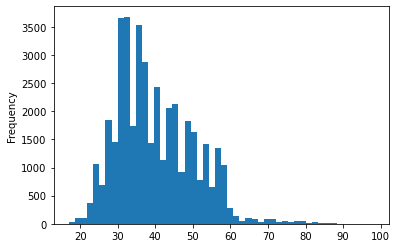

In [19]:
df['age'].plot(kind='hist', bins=50)

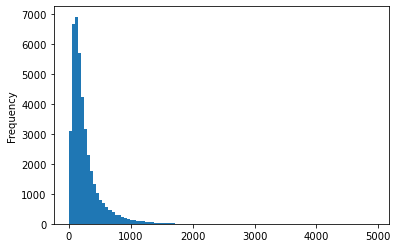

In [21]:
df['duration'].plot(kind='hist', bins=100)

In [23]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

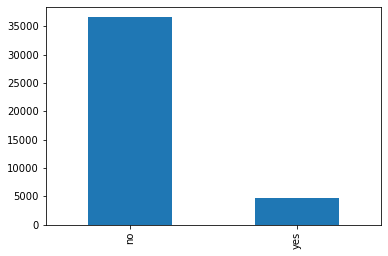

In [24]:
df['y'].value_counts().plot(kind='bar')

In [25]:
# 금융상품에 가입한 고객과 가입하지 않은 고객을 나눈다..

In [27]:
grouped = df.groupby('y')

In [29]:
yes_df = grouped.get_group('yes')
no_df = grouped.get_group('no')

In [30]:
yes_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [31]:
no_df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
# 대출(loan)을 받은 고객과 그렇지 않은 고객을 비교..
# 차이가 크다면, 예를 들어서, 대출을 받은 고객은 금융상품에
# 거의 가입하지 않았다..
# => 대출받은 고객에게는 판촉하지 않음...

In [33]:
yes_df['loan'].value_counts()

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [38]:
yes_loan_rate = yes_df.loan.value_counts()/len(yes_df)

In [39]:
no_loan_rate = no_df.loan.value_counts()/len(no_df)

In [41]:
# 대출을 받은 사람은 금융상품에 가입하는 비율이 낮다.

yes_loan_rate - no_loan_rate

no         0.006167
yes       -0.005067
unknown   -0.001100
Name: loan, dtype: float64

In [42]:
# 직업군에서 금융상품가입 비율을 비교...

In [46]:
# 금융상품 가입고객의 직업비율
yes_job_rate = yes_df.job.value_counts()/len(yes_df)

In [47]:
# 금융상품 미가입고객의 직업비율
no_job_rate = no_df.job.value_counts()/len(no_df)

In [53]:
diff_rate = yes_job_rate - no_job_rate

In [58]:
df1 = diff_rate/(yes_job_rate + no_job_rate)

In [60]:
df1[df1 > 0.4]

retired    0.453289
student    0.566176
Name: job, dtype: float64

In [61]:
df1[df1<0]

blue-collar     -0.263218
entrepreneur    -0.153889
housemaid       -0.066558
management      -0.002401
self-employed   -0.040222
services        -0.177994
technician      -0.022357
unknown         -0.002671
Name: job, dtype: float64

In [67]:
df['y1'] = df.y.replace({'no':0, 'yes':1})
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [68]:
pivot_cust = pd.pivot_table(df, 'y1', 'age','job', aggfunc='mean')
pivot_cust

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,,,,,,,,,,,,
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.428571,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476190,NaN,NaN,NaN
20,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.456522,0.5,NaN,NaN
21,0.083333,0.066667,NaN,0.0,0.0,NaN,0.5,0.083333,0.444444,0.0,0.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN


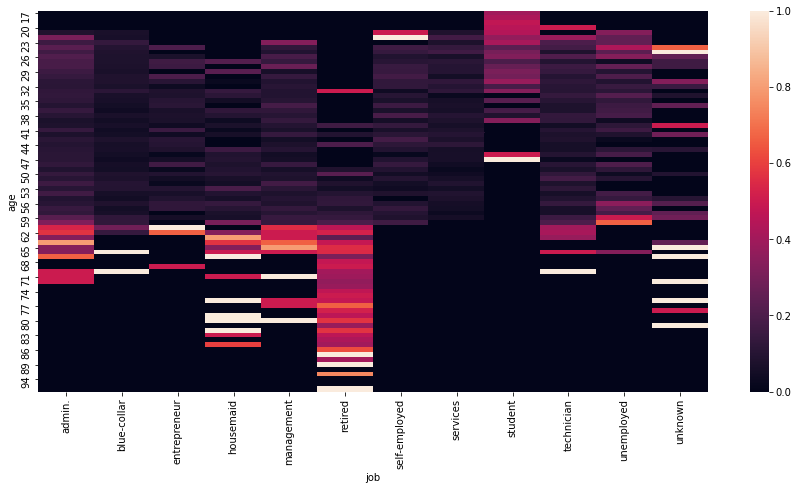

In [69]:
plt.figure(figsize=(15,7))
sns.heatmap(pivot_cust.fillna(0))